In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
# from scikeras.wrappers import KerasClassifier

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D

In [2]:
df = pd.read_csv(r'D:\internee.pk\TSK-000-186\heartattack_processed_data.csv')

df.head(-1)

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,CK-MB,Troponin,Result,CK-MB_normalized
0,63,1,66,160,83,1.80,0.012,0,0.004935
1,20,1,94,98,46,6.75,1.060,1,0.021453
2,56,1,64,160,77,1.99,0.003,0,0.005569
3,66,1,70,120,55,13.87,0.122,1,0.045212
4,54,1,64,112,65,1.08,0.003,0,0.002533
...,...,...,...,...,...,...,...,...,...
1313,86,0,40,179,68,5.22,0.011,0,0.016347
1314,44,1,94,122,67,1.63,0.006,0,0.004368
1315,66,1,84,125,55,1.33,0.172,1,0.003367
1316,45,1,85,168,104,1.24,4.250,1,0.003067


In [3]:
df = df.drop(columns=['Troponin', 'CK-MB'])

In [4]:
df = df.drop(columns='CK-MB_normalized')

In [5]:
# Split the dataset into features (X) and target variable (y)
X = df[['Age', 'Gender', 'Heart rate', 'Systolic blood pressure', 'Diastolic blood pressure']]
y = df['Result']

In [6]:
# Train a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

RandomForestClassifier(random_state=42)

In [7]:
# Get feature importance scores
importances = rf.feature_importances_

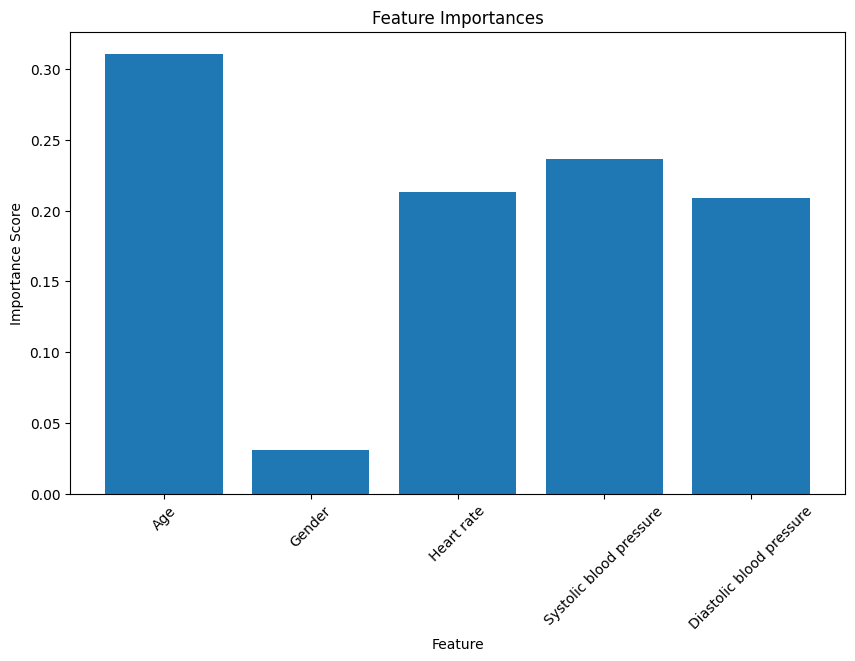

In [8]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(X.columns, importances)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.xticks(rotation=45)
plt.show()


In [9]:
# Create a DataFrame to store feature importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort features by importance scores in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Set threshold for selecting relevant features (e.g., importance score > 0.05)
threshold = 0.05

# Identify irrelevant features based on importance scores
irrelevant_features = feature_importance_df[feature_importance_df['Importance'] < threshold]['Feature']

# Remove irrelevant features from DataFrame
filtered_df = df.drop(columns=irrelevant_features)

In [10]:
filtered_df.head(-1)

,Age,Heart rate,Systolic blood pressure,Diastolic blood pressure,Result
0,63,66,160,83,0
1,20,94,98,46,1
2,56,64,160,77,0
3,66,70,120,55,1
4,54,64,112,65,0
...,...,...,...,...,...
1313,86,40,179,68,0
1314,44,94,122,67,0
1315,66,84,125,55,1
1316,45,85,168,104,1


we will not use filtered_df data because gender is also an important feature

In [11]:

# Calculate z-scores for each column
z_scores = (df - df.mean()) / df.std()

# Set threshold for outlier detection (e.g., z-score > 3 or < -3)
threshold = 3

# Identify outliers based on z-scores
outliers = (np.abs(z_scores) > threshold).any(axis=1)

# Remove outliers from DataFrame
cleaned_df = df[~outliers]


In [12]:
cleaned_df.reset_index(drop=True, inplace=True)
cleaned_df.head(-1)

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Result
0,63,1,66,160,83,0
1,20,1,94,98,46,1
2,56,1,64,160,77,0
3,66,1,70,120,55,1
4,54,1,64,112,65,0
...,...,...,...,...,...,...
1288,86,0,40,179,68,0
1289,44,1,94,122,67,0
1290,66,1,84,125,55,1
1291,45,1,85,168,104,1


**Generating and adding random height and weight data to the dataset**

In [13]:

# Set seed for reproducibility
np.random.seed(0)

# Generate random weight data in kg (assuming a normal distribution with mean 70 kg and standard deviation 10 kg)
random_weight = np.random.normal(loc=70, scale=10, size=len(cleaned_df)-1)

# Generate random height data in meters (assuming a normal distribution with mean 1.7 meters and standard deviation 0.1 meters)
random_height = np.random.normal(loc=1.7, scale=0.1, size=len(cleaned_df)-1)

# Insert NaN value at index 0 for weight and height arrays
random_weight = np.insert(random_weight, 0, np.nan)
random_height = np.insert(random_height, 0, np.nan)

# Add the random weight and height data to your dataset
cleaned_df['weight'] = random_weight
cleaned_df['height'] = random_height
cleaned_df

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18060\616817851.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['weight'] = random_weight
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18060\616817851.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['height'] = random_height


,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Result,weight,height
0,63,1,66,160,83,0,NaN,NaN
1,20,1,94,98,46,1,87.640523,1.604736
2,56,1,64,160,77,0,74.001572,1.860852
3,66,1,70,120,55,1,79.787380,1.643842
4,54,1,64,112,65,0,92.408932,1.720727
...,...,...,...,...,...,...,...,...
1289,44,1,94,122,67,0,70.992049,1.504632
1290,66,1,84,125,55,1,85.762990,1.729578
1291,45,1,85,168,104,1,75.023282,1.784259
1292,54,1,58,117,68,1,61.377330,1.724562


Removing the null value row

In [14]:
cleaned_df = cleaned_df.dropna(axis=0)
cleaned_df.reset_index(drop=True, inplace=True)
cleaned_df.head(-1)

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Result,weight,height
0,20,1,94,98,46,1,87.640523,1.604736
1,56,1,64,160,77,0,74.001572,1.860852
2,66,1,70,120,55,1,79.787380,1.643842
3,54,1,64,112,65,0,92.408932,1.720727
4,52,0,61,112,58,0,88.675580,1.730773
...,...,...,...,...,...,...,...,...
1287,86,0,40,179,68,0,64.624166,1.561022
1288,44,1,94,122,67,0,70.992049,1.504632
1289,66,1,84,125,55,1,85.762990,1.729578
1290,45,1,85,168,104,1,75.023282,1.784259


## Feature Creation and Engineering

**Body Mass Index (BMI)**

In [15]:
# Calculate BMI (Body Mass Index)
cleaned_df['BMI'] = cleaned_df['weight'] / (cleaned_df['height'] ** 2)
cleaned_df

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18060\1070223312.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['BMI'] = cleaned_df['weight'] / (cleaned_df['height'] ** 2)


,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Result,weight,height,BMI
0,20,1,94,98,46,1,87.640523,1.604736,34.032828
1,56,1,64,160,77,0,74.001572,1.860852,21.370623
2,66,1,70,120,55,1,79.787380,1.643842,29.526638
3,54,1,64,112,65,0,92.408932,1.720727,31.209727
4,52,0,61,112,58,0,88.675580,1.730773,29.602179
...,...,...,...,...,...,...,...,...,...
1288,44,1,94,122,67,0,70.992049,1.504632,31.358049
1289,66,1,84,125,55,1,85.762990,1.729578,28.669469
1290,45,1,85,168,104,1,75.023282,1.784259,23.565699
1291,54,1,58,117,68,1,61.377330,1.724562,20.637189


**Pulse Pressure**

In [16]:
# Calculate Pulse Pressure
cleaned_df['pulse_pressure'] = cleaned_df['Systolic blood pressure'] - cleaned_df['Diastolic blood pressure']
cleaned_df

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18060\2583870508.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['pulse_pressure'] = cleaned_df['Systolic blood pressure'] - cleaned_df['Diastolic blood pressure']


,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Result,weight,height,BMI,pulse_pressure
0,20,1,94,98,46,1,87.640523,1.604736,34.032828,52
1,56,1,64,160,77,0,74.001572,1.860852,21.370623,83
2,66,1,70,120,55,1,79.787380,1.643842,29.526638,65
3,54,1,64,112,65,0,92.408932,1.720727,31.209727,47
4,52,0,61,112,58,0,88.675580,1.730773,29.602179,54
...,...,...,...,...,...,...,...,...,...,...
1288,44,1,94,122,67,0,70.992049,1.504632,31.358049,55
1289,66,1,84,125,55,1,85.762990,1.729578,28.669469,70
1290,45,1,85,168,104,1,75.023282,1.784259,23.565699,64
1291,54,1,58,117,68,1,61.377330,1.724562,20.637189,49


**Categorize Condition based on Blood pressure**

In [17]:
# Categorize Blood Pressure
def categorize_blood_pressure(row):
    if row['Systolic blood pressure'] < 120 and row['Diastolic blood pressure'] < 80:
        return 'Normal'
    elif 120 <= row['Systolic blood pressure'] < 130 or 80 <= row['Diastolic blood pressure'] < 85:
        return 'Pre-Hypertension'
    else:
        return 'Hypertension'

cleaned_df['BP_based_Condition'] = cleaned_df.apply(categorize_blood_pressure, axis=1)
cleaned_df

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18060\716832573.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['BP_based_Condition'] = cleaned_df.apply(categorize_blood_pressure, axis=1)


,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Result,weight,height,BMI,pulse_pressure,BP_based_Condition
0,20,1,94,98,46,1,87.640523,1.604736,34.032828,52,Normal
1,56,1,64,160,77,0,74.001572,1.860852,21.370623,83,Hypertension
2,66,1,70,120,55,1,79.787380,1.643842,29.526638,65,Pre-Hypertension
3,54,1,64,112,65,0,92.408932,1.720727,31.209727,47,Normal
4,52,0,61,112,58,0,88.675580,1.730773,29.602179,54,Normal
...,...,...,...,...,...,...,...,...,...,...,...
1288,44,1,94,122,67,0,70.992049,1.504632,31.358049,55,Pre-Hypertension
1289,66,1,84,125,55,1,85.762990,1.729578,28.669469,70,Pre-Hypertension
1290,45,1,85,168,104,1,75.023282,1.784259,23.565699,64,Hypertension
1291,54,1,58,117,68,1,61.377330,1.724562,20.637189,49,Normal


## EDA

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18060\607883997.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned_df['pulse_pressure'])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18060\607883997.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cleaned_df['BMI'])
C:\Users\LENOVO\AppD

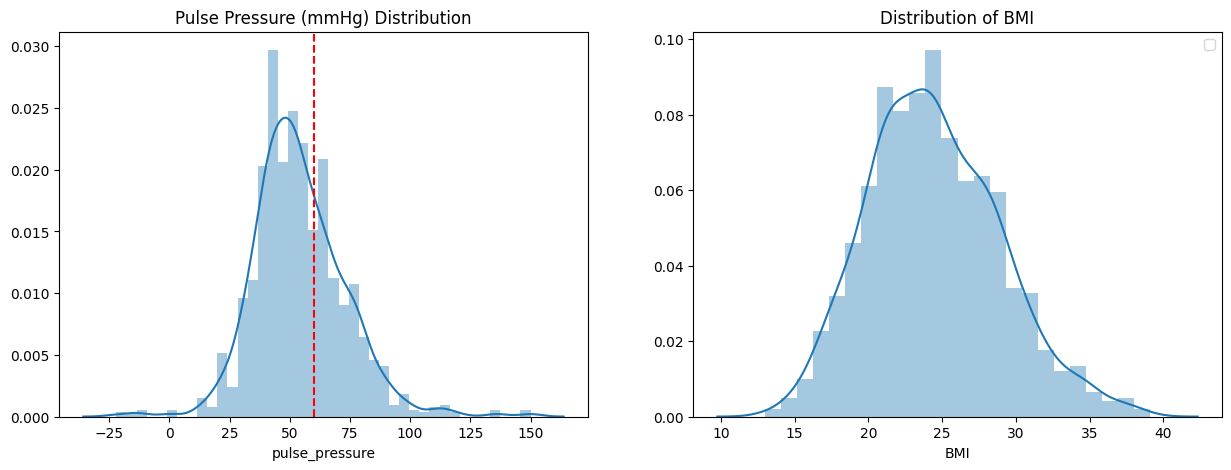

In [18]:

fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.distplot(cleaned_df['pulse_pressure'])
plt.title('Pulse Pressure (mmHg) Distribution')
plt.axvline(x=60, color='r', linestyle='--', label='High pulse pressure: over 60 mmHg')
plt.ylabel('')

plt.subplot(1, 2, 2)
sns.distplot(cleaned_df['BMI'])
plt.title('Distribution of BMI')
# plt.xlim(10,50)
# plt.axvline(x=60, color='r', linestyle='--', label='High pulse pressure: over 60 mmHg')
plt.ylabel('')
plt.legend()

Text(0, 0.5, '')

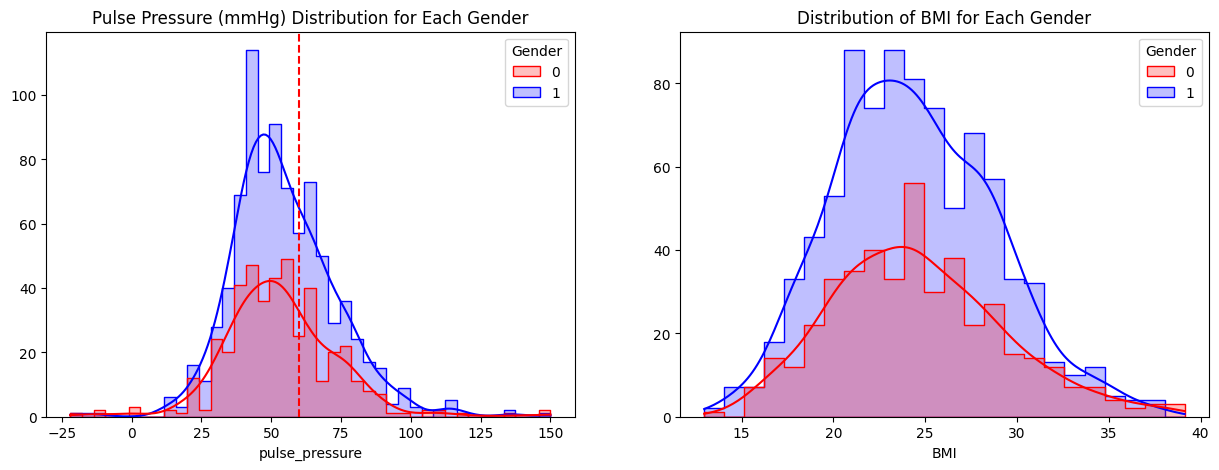

In [19]:


cleaned_df = cleaned_df.dropna(subset=['Gender','pulse_pressure', 'BMI'])
fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=cleaned_df, x='pulse_pressure', hue='Gender', element='step', palette=['Red', 'Blue'], kde=True)
plt.title('Pulse Pressure (mmHg) Distribution for Each Gender')
plt.axvline(x=60, color='r', linestyle='--', label='High pulse pressure: over 60 mmHg')
plt.ylabel('')


plt.subplot(1, 2, 2)
sns.histplot(data=cleaned_df, x='BMI', hue='Gender', element='step', palette=['Red', 'Blue'], kde=True)
plt.title('Distribution of BMI for Each Gender')
# plt.xlim(10,50)
# plt.axvline(x=60, color='r', linestyle='--', label='High pulse pressure: over 60 mmHg')
plt.ylabel('')



Text(0, 0.5, '')

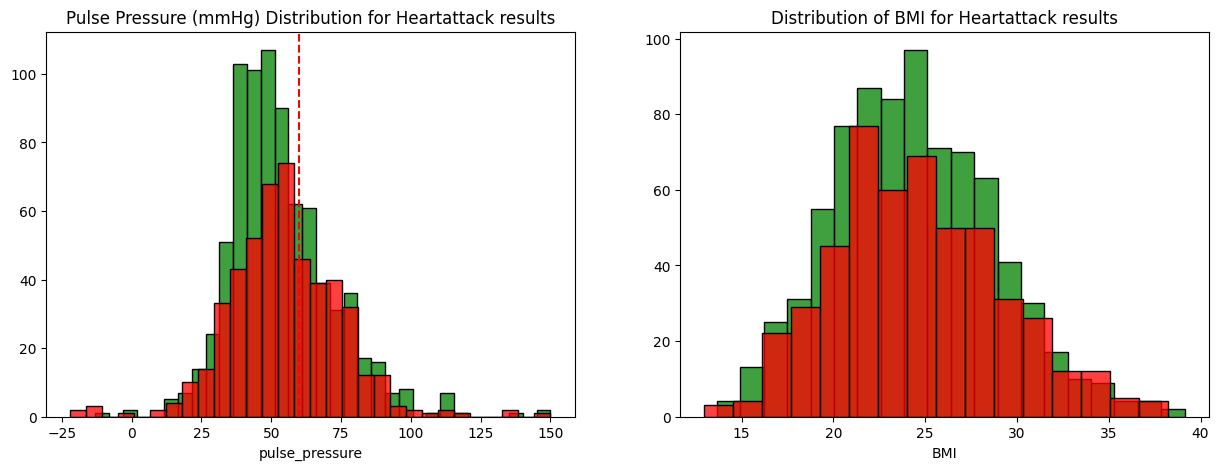

In [20]:
fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
positive = cleaned_df[cleaned_df['Result']==0]['pulse_pressure']
negative = cleaned_df[cleaned_df['Result']==1]['pulse_pressure']
sns.histplot(negative, color='Green')
sns.histplot(positive, color='Red')
plt.title('Pulse Pressure (mmHg) Distribution for Heartattack results')
plt.axvline(x=60, color='r', linestyle='--', label='High pulse pressure: over 60 mmHg')
plt.ylabel('')


plt.subplot(1, 2, 2)
positive = cleaned_df[cleaned_df['Result']==0]['BMI']
negative = cleaned_df[cleaned_df['Result']==1]['BMI']
sns.histplot(negative, color='Green')
sns.histplot(positive, color='Red')
plt.title('Distribution of BMI for Heartattack results')
# plt.xlim(10,50)
# plt.axvline(x=60, color='r', linestyle='--', label='High pulse pressure: over 60 mmHg')
plt.ylabel('')


Text(0.5, 0, 'Age (years)')

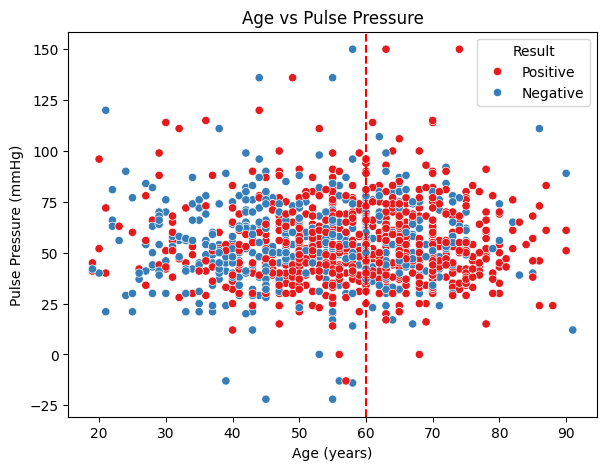

In [21]:
cleaned_df = cleaned_df.dropna(subset=['Age','Gender','pulse_pressure', 'BMI'])
fig = plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=cleaned_df, x='Age', y='pulse_pressure', hue=cleaned_df['Result'].apply(lambda x: 'Negative' if x == 0 else 'Positive'), palette='Set1')
plt.title('Age vs Pulse Pressure')
plt.axvline(x=60, color='r', linestyle='--', label='High pulse pressure: over 60 mmHg')
plt.ylabel('Pulse Pressure (mmHg)')
plt.xlabel('Age (years)')


## Data Transformation:

In [22]:
# Perform one-hot encoding for the 'BP_based_condition' column
cleaned_df_encoded = pd.get_dummies(cleaned_df, columns=['BP_based_Condition'])

# Display the first few rows of the encoded dataframe
print(cleaned_df_encoded.head())

   Age  Gender  Heart rate  Systolic blood pressure  Diastolic blood pressure  \
0   20       1          94                       98                        46   
1   56       1          64                      160                        77   
2   66       1          70                      120                        55   
3   54       1          64                      112                        65   
4   52       0          61                      112                        58   

   Result     weight    height        BMI  pulse_pressure  \
0       1  87.640523  1.604736  34.032828              52   
1       0  74.001572  1.860852  21.370623              83   
2       1  79.787380  1.643842  29.526638              65   
3       0  92.408932  1.720727  31.209727              47   
4       0  88.675580  1.730773  29.602179              54   

   BP_based_Condition_Hypertension  BP_based_Condition_Normal  \
0                            False                       True   
1               

## Model Selection:

### For the heart attack, the problem type is classification, as the target variable 'Result' is categorical (indicating the presence or absence of a heart attack). 

The appropiate machine learning algorithm that i would consider for this problem would be either Random Forest classifier or Neural Networks.

The choice of algorithm depends on the specific problem and the trade-offs between model complexity, interpretability, and computational efficiency. For example, if interpretability and computational efficiency is important, Random Forest may be a good choice. If model complexity is important, Neural Networks may be a good choice. It is important to evaluate and compare the performance of different algorithms based on appropriate evaluation metrics and to choose the algorithm that best balances these factors.

### Split data into X (input) and y (target):

In [23]:
from sklearn.preprocessing import LabelEncoder

# Split the dataset into features (X) and target variable (y)
X = cleaned_df[['Age', 'Gender', 'Heart rate', 'Systolic blood pressure', 'Diastolic blood pressure', 'weight', 'height', 'BMI', 'pulse_pressure', 'BP_based_Condition']]
y = cleaned_df['Result']

le = LabelEncoder()
X['BP_based_Condition'] = le.fit_transform(X['BP_based_Condition'])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18060\2622891547.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['BP_based_Condition'] = le.fit_transform(X['BP_based_Condition'])


### Split data into train and test data and creating Random Forest Classification Model

In [24]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [25]:
# Make predictions on the testing set
y_pred = rf.predict(X_test)

# Evaluate the model using accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Evaluate the model using confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Evaluate the model using classification report
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)

# Tune hyperparameters using GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]}
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Train a new model with the best hyperparameters
best_rf = RandomForestClassifier(**grid_search.best_params_)
best_rf.fit(X_train, y_train)

# Make predictions on the testing set using the best model
y_pred_best = best_rf.predict(X_test)

# Evaluate the best model using accuracy score
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Best Accuracy:", accuracy_best)

Accuracy: 0.6138996138996139
Confusion Matrix:
[[ 34  66]
 [ 34 125]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.34      0.40       100
           1       0.65      0.79      0.71       159

    accuracy                           0.61       259
   macro avg       0.58      0.56      0.56       259
weighted avg       0.59      0.61      0.59       259

Best Parameters: {'max_depth': 5, 'n_estimators': 50}
Best Score: 0.6450494817316261
Best Accuracy: 0.637065637065637


# Make Predictions from the model

In [27]:
# Create a sample patient data
patient_data = pd.DataFrame({
    'Age': [20],
    'Gender': [1],  # 1 for male, 0 for female
    'Heart rate': [78],
    'Systolic blood pressure': [125],
    'Diastolic blood pressure': [87],
    'weight': [40],
    'height': [1.7],
    'BMI': [24.5],
    'pulse_pressure': [40],
    'BP_based_Condition': [0]  # 0 for Normal, 1 for Pre-Hypertension, 2 for Hypertension
})

# Fit the LabelEncoder on all possible labels
le.fit(patient_data['BP_based_Condition'].unique())

# Encode the categorical value
patient_data['BP_based_Condition'] = le.transform(patient_data['BP_based_Condition'])

# Make predictions
prediction = best_rf.predict(patient_data)

# Print the prediction result
if prediction[0] == 1:
    print("The patient is likely to have a heart attack.")
else:
    print("The patient is not likely to have a heart attack.")

The patient is not likely to have a heart attack.


### **Observation**

The model seems to be  heavily reliant on the ```Age``` feature when making predictions, and is less sensitive to changes in the other features. As we explored feature importance earlier in our code, the ```Age``` feature appears to be more dominant than other features. 

## Upsampling and downsampling the data for Age 

In [28]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [29]:
# Define the minority and majority classes based on the Age column
minority_class = cleaned_df[cleaned_df['Age'] < cleaned_df['Age'].quantile(0.25)]
majority_class = cleaned_df[cleaned_df['Age'] >= cleaned_df['Age'].quantile(0.25)]

# Define the target variables for the minority and majority classes
minority_target = np.ones(len(minority_class))
majority_target = np.zeros(len(majority_class))

# Combine the data and target variables
combined_df = pd.concat([minority_class, majority_class])
combined_target = np.concatenate([minority_target, majority_target])

# Define the oversampling and undersampling objects
ros = RandomOverSampler(sampling_strategy='auto')
rus = RandomUnderSampler(sampling_strategy='auto')

# First, upsample the minority class
X_resampled, y_resampled = ros.fit_resample(combined_df, combined_target)

# Then, downsample the majority class
X_resampled, y_resampled = rus.fit_resample(X_resampled, y_resampled)

# Combine the resampled data into a DataFrame
resampled_df = pd.DataFrame(X_resampled, columns=cleaned_df.columns)
resampled_df['Target'] = y_resampled

# Shuffle the data
resampled_df = resampled_df.sample(frac=1).reset_index(drop=True)

# Display the first 10 rows of the resampled data
print(resampled_df.head())

   Age  Gender  Heart rate  Systolic blood pressure  Diastolic blood pressure  \
0   22       0          63                      170                       104   
1   44       0          59                      106                        58   
2   43       1          80                       65                        53   
3   38       0          90                      135                        75   
4   37       1          78                       95                        59   

   Result     weight    height        BMI  pulse_pressure BP_based_Condition  \
0       0  83.014281  1.843157  24.435895              66       Hypertension   
1       0  70.648561  1.702186  24.383128              48             Normal   
2       0  82.213850  1.633496  30.811222              12             Normal   
3       1  63.054321  1.558340  25.965137              60       Hypertension   
4       1  77.519466  1.737502  25.677938              36             Normal   

   Target  
0     1.0  
1     1.

In [30]:
# Split the dataset into features (X) and target variable (y)
Xb = resampled_df[['Age', 'Gender', 'Heart rate', 'Systolic blood pressure', 'Diastolic blood pressure', 'weight', 'height', 'BMI', 'pulse_pressure', 'BP_based_Condition']]
yb = resampled_df['Result']

le = LabelEncoder()
Xb['BP_based_Condition'] = le.fit_transform(Xb['BP_based_Condition'])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18060\2129707658.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Xb['BP_based_Condition'] = le.fit_transform(Xb['BP_based_Condition'])


### Splitting the resampled data into test and train and building a new model 

In [31]:
# Split the dataset into training and testing sets
X_trainb, X_testb, y_trainb, y_testb = train_test_split(Xb, yb, test_size=0.2, random_state=42)

# Train a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_trainb, y_trainb)

RandomForestClassifier(random_state=42)

In [32]:
# Make predictions on the testing set
y_pred = rf.predict(X_testb)

# Evaluate the model using accuracy score
accuracy = accuracy_score(y_testb, y_pred)
print("Accuracy:", accuracy)

# Evaluate the model using confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_testb, y_pred)
print("Confusion Matrix:")
print(cm)

# Evaluate the model using classification report
from sklearn.metrics import classification_report
cr = classification_report(y_testb, y_pred)
print("Classification Report:")
print(cr)

# Tune hyperparameters using GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10]}
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_trainb, y_trainb)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Train a new model with the best hyperparameters
best_rf = RandomForestClassifier(**grid_search.best_params_)
best_rf.fit(X_trainb, y_trainb)

# Make predictions on the testing set using the best model
y_pred_best = best_rf.predict(X_testb)

# Evaluate the best model using accuracy score
accuracy_best = accuracy_score(y_testb, y_pred_best)
print("Best Accuracy:", accuracy_best)

Accuracy: 0.8261964735516373
Confusion Matrix:
[[120  57]
 [ 12 208]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.68      0.78       177
           1       0.78      0.95      0.86       220

    accuracy                           0.83       397
   macro avg       0.85      0.81      0.82       397
weighted avg       0.84      0.83      0.82       397

Best Parameters: {'max_depth': 10, 'n_estimators': 200}
Best Score: 0.7987381703470031
Best Accuracy: 0.8211586901763224


### **Observation**

Our model based on resampled data of ```Age``` has better accuracy of **82%** whereas the previous model achieved accuracy of **61%**

In [35]:
# Create a sample patient data
patient_data = pd.DataFrame({
    'Age': [60],
    'Gender': [1],  # 1 for male, 0 for female
    'Heart rate': [78],
    'Systolic blood pressure': [125],
    'Diastolic blood pressure': [87],
    'weight': [40],
    'height': [1.7],
    'BMI': [24.5],
    'pulse_pressure': [40],
    'BP_based_Condition': [0]  # 0 for Normal, 1 for Pre-Hypertension, 2 for Hypertension
})

# Fit the LabelEncoder on all possible labels
le.fit(patient_data['BP_based_Condition'].unique())

# Encode the categorical value
patient_data['BP_based_Condition'] = le.transform(patient_data['BP_based_Condition'])

# Make predictions
prediction = best_rf.predict(patient_data)

# Print the prediction result
if prediction[0] == 1:
    print("The patient is likely to have a heart attack.")
else:
    print("The patient is not likely to have a heart attack.")

The patient is likely to have a heart attack.
